In [24]:
import torch
from torch import nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import os
import random
from matplotlib import pyplot as plt

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
#Denesnet Model
class DenseNet169(nn.Module):

    def __init__(self, num_classes):
        super(DenseNet169, self).__init__()

        #Load pre-trained DenseNet-169 model
        self.densenet169 = models.densenet169(weights=True)

        #Modify the classifier to match the number of classes
        # model.features.conv0 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        in_features = self.densenet169.classifier.in_features
        self.densenet169.classifier = nn.Linear(in_features, num_classes)
        self.densenet169.features.conv0 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

    def forward(self, x):
        x = self.densenet169(x)
        return x

model = DenseNet169(15)

# model = model.load_state_dict(torch.load('Model/XRayresenet5k.pth'))

model.to(device)

DenseNet169(
  (densenet169): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mome

In [27]:
img_path = 'Dataset\\Image\\images_001\\' +random.choice(os.listdir('Dataset/Image/images_001'))
img = Image.open(img_path)
img = img.resize((224, 224))
img = transforms.ToTensor()(img)
img.to(device)

tensor([[[0.8235, 0.8000, 0.7765,  ..., 0.0196, 0.0196, 0.0118],
         [0.7961, 0.7686, 0.7216,  ..., 0.0196, 0.0196, 0.0118],
         [0.7725, 0.7412, 0.6157,  ..., 0.0196, 0.0196, 0.0118],
         ...,
         [1.0000, 0.9961, 0.9608,  ..., 0.6275, 0.6118, 0.5569],
         [1.0000, 1.0000, 0.9647,  ..., 0.6588, 0.6431, 0.5804],
         [1.0000, 1.0000, 0.9686,  ..., 0.6941, 0.6784, 0.6235]]])

In [28]:
model.eval()
with torch.inference_mode():
    pred = model(img.unsqueeze(0))
    _, predicted = torch.max(pred, 1)
    predicted = predicted.item()


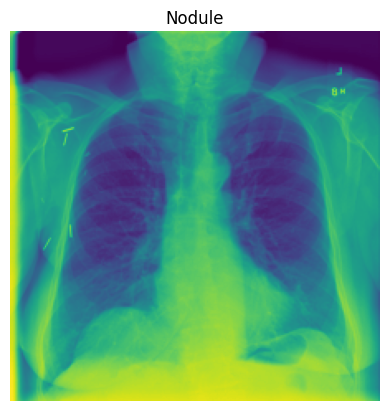

In [33]:
classes = ['Atelectasis' , 'Cardiomegaly', 'Effusion', 'Infiltration' , 'Mass', 'Nodule' , 'Pneumonia' ,
            'Pneumothorax' , 'Consolidation' , 'Edema', 'Emphysema' , 'Fibrosis' ,'Pleural_Thickening','Hernia','No Finding']
label_idx = dict(enumerate(classes,start=0))
plt.imshow(img.permute(1, 2, 0))
plt.title(label_idx[predicted])
plt.axis('off');